In [1]:
# Go to source root
import os
os.chdir('../src/')

In [2]:
from email_ingestion import EmailIngester

ham_path = '../data/raw/ham/beck-s/'
spam_path = '../data/raw/spam/GP/'

ingester = EmailIngester(tokenize=True)
ham_data = ingester.ingest_folder(ham_path)
spam_data = ingester.ingest_folder(spam_path)

Processed 1966 / 1966 emails (1.588s).
Processed 13589 / 13719 emails (25.567s).


In [3]:
def add_label(data, is_spam=False):
    for record in data:
        record['is_spam'] = is_spam
        
add_label(ham_data, is_spam=False)
add_label(spam_data, is_spam=True)
email_data = ham_data + spam_data

### Corpus indexing
Before generating bag of words features, the entire corpus of tokens needs to be indexed.

In [4]:
def generate_corpus(data):
    word_counts = count_words(data)
    
    filter_infrequent_words(word_counts, threshold=5)
    filter_long_words(word_counts, threshold=20)
    
    return word_counts


def count_words(data):
    word_counts = {}

    for record in spam_data:

        if 'tokens' not in record:
            continue

        for token in record['tokens']:
            if token in word_counts:
                word_counts[token] += 1
            else:
                word_counts[token] = 1
    return word_counts    


def filter_infrequent_words(word_counts, threshold=5):
    infrequent_words = []
    
    for word in word_counts:
        if word_counts[word] < threshold:
            infrequent_words.append(word)
            
    for word in infrequent_words:
        word_counts.pop(word)
        
def filter_long_words(word_counts, threshold=20):
    long_words = []
    
    for word in word_counts:
        if len(word) > threshold:
            long_words.append(word)
            
    for word in long_words:
        word_counts.pop(word)

### Characteristics of unigrams

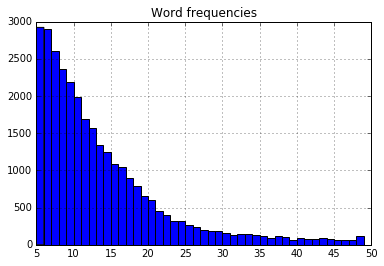

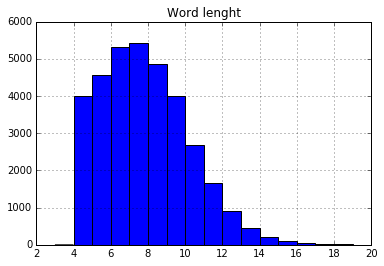

Corpus length: 34308


autonomic            5
paucity              5
mobi                 5
pattichis            5
comique              5
lunatic              5
sparling             5
lunde                5
sparrow              5
quantico             5
tycoonate            5
imprudent            5
impregnable          5
twork                5
moaned               5
antonius             5
twitch               5
patrol               5
spatlum              5
gerretson            5
cresswort            5
impost               5
gerund               5
spass                5
typesetter           5
imprudentness        5
drgoodhealth         5
u18a                 5
quadriceps           5
mockery              5
                 ...  
free              2801
been              2804
within            2823
money             2845
these             2919
which             2933
message           2979
2004              3011
over              3050
pills             3131
time              3511
nbsp              3705
font       

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# TODO No longer works b/c tokenization
corpus = generate_corpus(email_data)

word_freq = pd.Series(corpus)
word_freq.hist(bins=range(5, 50))
plt.title('Word frequencies')
plt.show()

word_len = pd.Series(map(lambda s: len(s), list(corpus.keys())))
word_len.hist(bins=range(3, 20))
plt.title("Word lenght")
plt.show()

print("Corpus length:", len(corpus))
word_freq.sort_values()

